Q1. Create a file “people.txt” with the following data:<br>
Age agegroup height status yearsmarried
* 21 adult 6.0 single -1
* 2 child 3 married 0
* 18 adult 5.7 married 20
* 221 elderly 5 widowed 2
* 34 child -7 married 3


i. Read the data from the file “people.txt”. <br>
ii. Create a ruleset E that contain rules to check for the following conditions:
  1. The age should be in the range 0-150.
  2. The age should be greater than yearsmarried.
  3. The status should be married or single or widowed.
  4. If age is less than 18 the agegroup should be child, if age is between 18
     and 65 the agegroup should be adult, if age is more than 65 the agegroup should be elderly.
     
iii. Check whether ruleset E is violated by the data in the file people.txt. <br>
iv. Summarize the results obtained in part (iii) <br>
v. Visualize the results obtained in part (iii)

In [27]:
# To create the file

f = open("people.txt", "w")
f.write("Age agegroup height status yearsmarried\n21 adult 6.0 single -1\n2 child 3 married 0\n18 adult 5.7 married 20\n221 elderly 5 widowed 2\n34 child -7 married 3")
f.close()

In [28]:
# to read file and solve the questions

import pandas as pd
import numpy as np

data = pd.read_csv('people.txt', sep=" ", header=0)
data

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


In [29]:
X = (data['Age'] > 0) & (data['Age'] < 150) & (data['yearsmarried'] < data['Age']) & ((data['status'] == 'single') | (data['status'] == 'married') | (data['status'] =='widower'))

X

0     True
1     True
2    False
3    False
4     True
dtype: bool

(array([1., 0., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ]),
 <BarContainer object of 10 artists>)

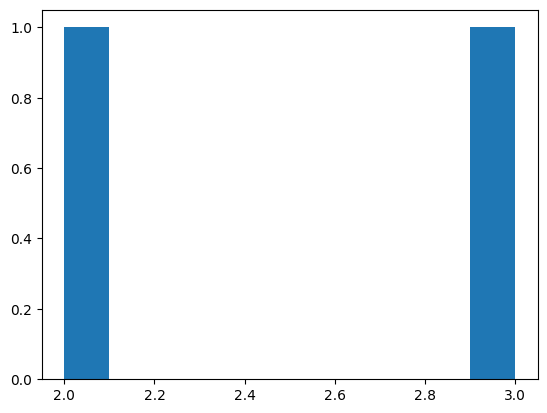

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(X.value_counts())

Q2. Perform the following preprocessing tasks on the dirty_iris dataset <br>
i) Calculate the number and percentage of observations that are complete. <br>
ii) Replace all the special values in data with NA. <br>
iii) Define these rules in a separate text file and read them. <br>
(Use editfile function in R (package editrules). Use similar function in Python). <br>
Print the resulting constraint object.
<br>

  – Species should be one of the following values: setosa, versicolor or
  virginica.

  – All measured numerical properties of an iris should be positive.

  – The petal length of an iris is at least 2 times its petal width.

  – The sepal length of an iris cannot exceed 30 cm.

  – The sepals of an iris are longer than its petals.

iv) Determine how often each rule is broken (violatedEdits). Also summarize
and plot the result. <br>
v) Find outliers in sepal length using boxplot and boxplot.stats

In [31]:
# loading modules of sklearn for preprocessing and loading the datasets

from sklearn.preprocessing import *

iris_data = pd.read_csv('dirty_iris.csv')

iris_data.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


Number of complete observations: 96
Number of complete observations in percentage: 64.0


<Axes: >

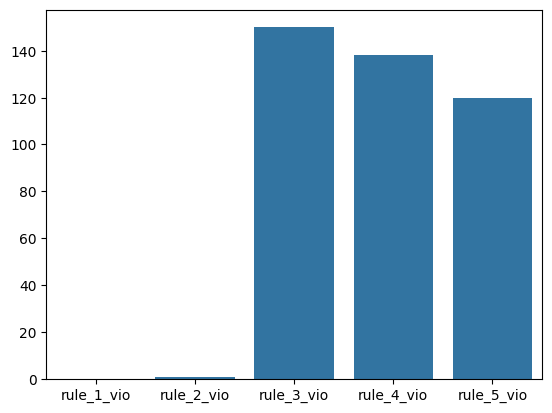

In [32]:
complete_observations = iris_data.notnull().all(axis=1).sum()
print(f"Number of complete observations: {complete_observations}")
shape = iris_data.shape[0]
print(f"Number of complete observations in percentage: {complete_observations/shape * 100}")

v1, v2, v3, v4, v5 = 0, 0, 0, 0, 0

for i in range(iris_data.shape[0]):
  if iris_data['Species'][i] not in ['setosa', 'versicolor', 'virginica']:
    v1 += 1
  if ((iris_data['Sepal.Length'][i] < 0) or (iris_data['Sepal.Width'][i] < 0) or (iris_data['Petal.Width'][i] < 0) or (iris_data['Petal.Length'][i] < 0)):
    v2 += 1
  if iris_data['Petal.Length'][i] != 2*(iris_data['Sepal.Length'][i]):
    v3 += 1
  if iris_data['Sepal.Length'][i] < 30:
    v4 += 1
  if iris_data['Petal.Length'][i] < iris_data['Sepal.Length'][i]:
    v5 += 1

sns.barplot(x=['rule_1_vio', 'rule_2_vio', 'rule_3_vio', 'rule_4_vio', 'rule_5_vio'], y = [v1, v2, v3, v4, v5])


<Axes: >

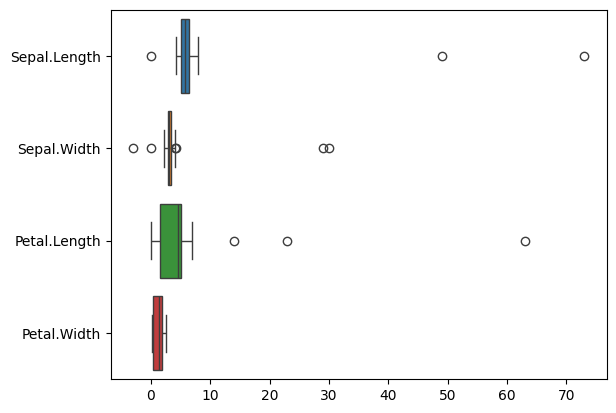

In [33]:
sns.boxplot(iris_data, orient='h')

## we can see that there are outliers present in Sepal.Length, sepal.Width and Petal.Length

Q3. Load the data from wine dataset. Check whether all attributes are standardized or not (mean is 0 and standard deviation is 1). If not, standardize the attributes.

In [34]:
# loading the dataset

from sklearn.datasets import *

iris_df = load_iris(as_frame=True)
wine_df = load_wine(as_frame=True)

In [35]:
iris_df.data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [36]:
wine_df.data.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [37]:
ss = StandardScaler()
iris_transformed = pd.DataFrame(ss.fit_transform(iris_df.data), columns=iris_df.data.columns)
wine_transformed = pd.DataFrame(ss.fit_transform(wine_df.data), columns=wine_df.data.columns)

# Data After transformed can be visualised as a standard normal of all the attributes except target column

<Axes: ylabel='Density'>

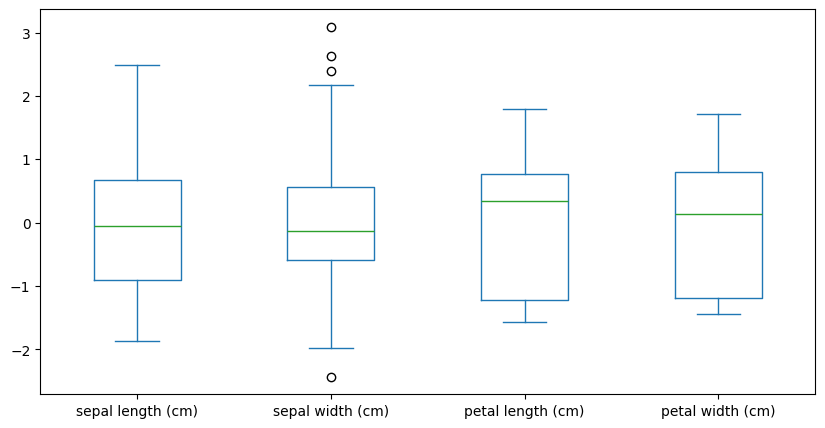

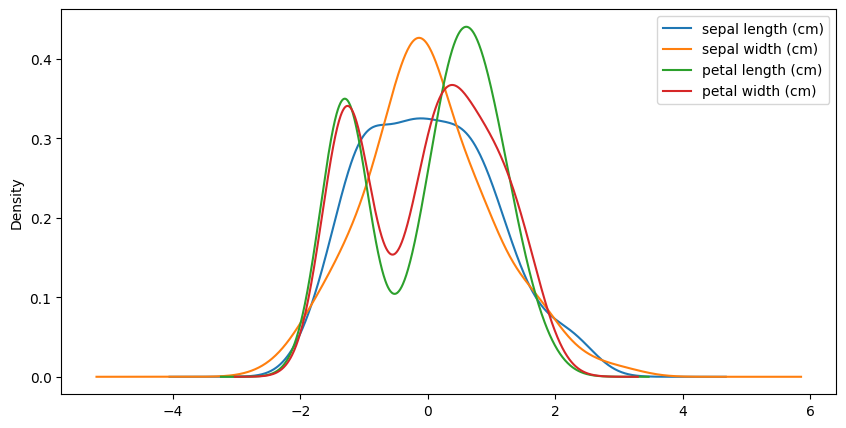

In [38]:
iris_transformed.describe()
# Visualizing the data
iris_transformed.plot(kind='box', figsize=(10, 5))
iris_transformed.plot(kind='kde', figsize=(10, 5))


<Axes: ylabel='Density'>

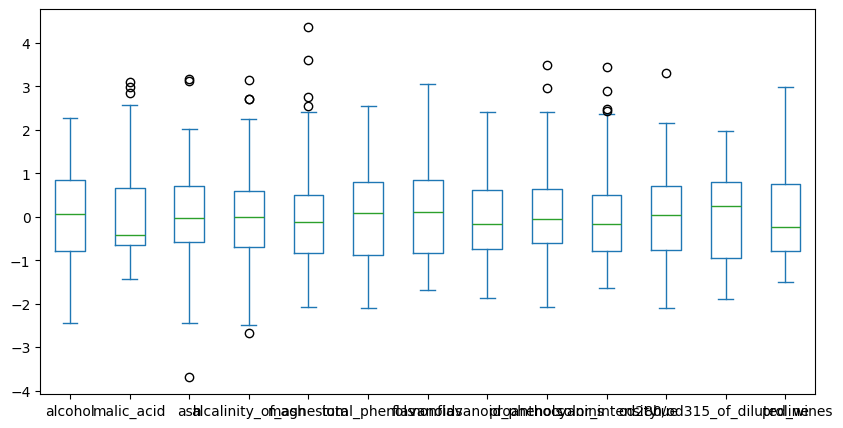

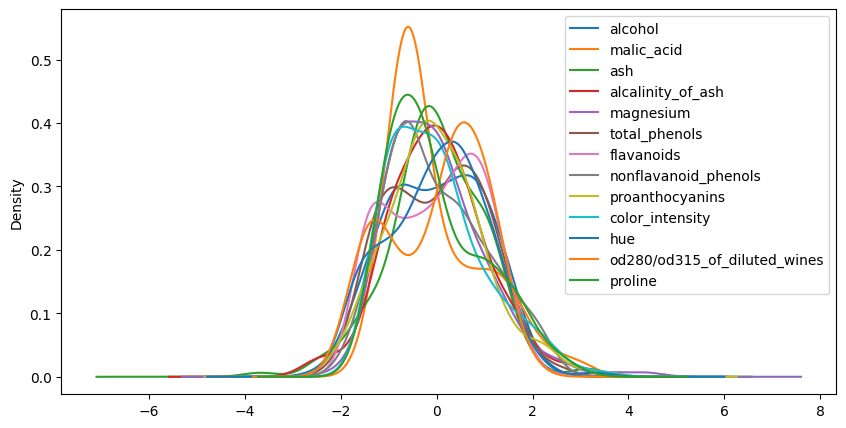

In [39]:
wine_transformed.describe()
# Visualizing the data
wine_transformed.plot(kind='box', figsize=(10, 5))
wine_transformed.plot(kind='kde', figsize=(10, 5))

# Run following algorithms on 2 real datasets and use appropriate evaluation measures to compute correctness of obtained patterns:

Q4. Run Apriori algorithm to find frequent itemsets and association rules <br>

  1.1 Use minimum support as 50% and minimum confidence as 75%
  
  1.2 Use minimum support as 60% and minimum confidence as 60 %

In [40]:
#importing modules for the Apriori Algorithm and finding frequent itemsets from the same

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [41]:
#loading breast_cancer data from sklearn module

breast_cancer = load_breast_cancer(as_frame=True)

breast_cancer.data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [42]:
te = TransactionEncoder()
te_ary = te.fit(breast_cancer).transform(breast_cancer)
df = pd.DataFrame(te_ary, columns=te.columns_)

X = apriori(df, min_support=0.5, use_colnames=False, low_memory=False)

print(X)

df['support'] = X['support']
df['itemsets'] = X['itemsets']

    support    itemsets
0     0.875         (6)
1     0.750         (8)
2     0.625        (13)
3     0.500        (16)
4     0.625        (18)
5     0.750      (8, 6)
6     0.625     (13, 6)
7     0.500     (16, 6)
8     0.625     (18, 6)
9     0.625     (8, 13)
10    0.500     (8, 16)
11    0.500     (8, 18)
12    0.625  (8, 13, 6)
13    0.500  (8, 16, 6)
14    0.500  (8, 18, 6)


In [43]:
association_rules(df, metric='confidence', min_threshold=0.75, support_only=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(8),(6),0.750,0.875,0.750,1.000000,1.142857,0.093750,inf,0.500000
1,(6),(8),0.875,0.750,0.750,0.857143,1.142857,0.093750,1.75,1.000000
2,(13),(6),0.625,0.875,0.625,1.000000,1.142857,0.078125,inf,0.333333
3,(16),(6),0.500,0.875,0.500,1.000000,1.142857,0.062500,inf,0.250000


In [44]:
#loading wine dataset and working the same

wine = load_wine(as_frame=True)

te = TransactionEncoder()
te_ary = te.fit(wine).transform(wine)
df = pd.DataFrame(te_ary, columns=te.columns_)

X = apriori(df, min_support=0.5, use_colnames=False, low_memory=False)

print(X)

df['support'] = X['support']
df['itemsets'] = X['itemsets']

print(association_rules(df, metric='confidence', min_threshold=0.75, support_only=False))

     support        itemsets
0   0.833333             (6)
1   0.666667             (8)
2   0.500000            (11)
3   0.666667            (13)
4   0.666667            (15)
5   0.666667          (8, 6)
6   0.500000         (11, 6)
7   0.666667         (13, 6)
8   0.666667         (6, 15)
9   0.500000         (8, 11)
10  0.666667         (8, 13)
11  0.500000         (8, 15)
12  0.500000        (11, 13)
13  0.500000        (13, 15)
14  0.500000      (8, 11, 6)
15  0.666667      (8, 13, 6)
16  0.500000      (8, 6, 15)
17  0.500000     (11, 13, 6)
18  0.500000     (13, 6, 15)
19  0.500000     (8, 11, 13)
20  0.500000     (8, 13, 15)
21  0.500000  (8, 11, 13, 6)
22  0.500000  (8, 13, 6, 15)
  antecedents consequents  antecedent support  consequent support   support  \
0         (8)         (6)            0.666667            0.833333  0.666667   
1         (6)         (8)            0.833333            0.666667  0.666667   

   confidence  lift  leverage  conviction  zhangs_metric  
0      

In [45]:
wine = load_wine(as_frame=True)

te = TransactionEncoder()
te_ary = te.fit(wine).transform(wine)
df = pd.DataFrame(te_ary, columns=te.columns_)

X = apriori(df, min_support=0.6, use_colnames=False, low_memory=False)

print(X)

df['support'] = X['support']
df['itemsets'] = X['itemsets']

print(association_rules(df, metric='confidence', min_threshold=0.6, support_only=False))

    support    itemsets
0  0.833333         (6)
1  0.666667         (8)
2  0.666667        (13)
3  0.666667        (15)
4  0.666667      (8, 6)
5  0.666667     (13, 6)
6  0.666667     (6, 15)
7  0.666667     (8, 13)
8  0.666667  (8, 13, 6)
  antecedents consequents  antecedent support  consequent support   support  \
0         (8)         (6)            0.666667            0.833333  0.666667   
1         (6)         (8)            0.833333            0.666667  0.666667   
2        (13)         (6)            0.666667            0.833333  0.666667   
3         (6)        (13)            0.833333            0.666667  0.666667   

   confidence  lift  leverage  conviction  zhangs_metric  
0         1.0   1.2  0.111111         inf            0.5  
1         0.8   1.2  0.111111    1.666667            1.0  
2         1.0   1.2  0.111111         inf            0.5  
3         0.8   1.2  0.111111    1.666667            1.0  


In [46]:
te = TransactionEncoder()
te_ary = te.fit(breast_cancer).transform(breast_cancer)
df = pd.DataFrame(te_ary, columns=te.columns_)

X = apriori(df, min_support=0.6, use_colnames=False, low_memory=False)

print(X)

df['support'] = X['support']
df['itemsets'] = X['itemsets']

print(association_rules(df, metric='confidence', min_threshold=0.6, support_only=False))

   support    itemsets
0    0.875         (6)
1    0.750         (8)
2    0.625        (13)
3    0.625        (18)
4    0.750      (8, 6)
5    0.625     (13, 6)
6    0.625     (18, 6)
7    0.625     (8, 13)
8    0.625  (8, 13, 6)
  antecedents consequents  antecedent support  consequent support  support  \
0         (8)         (6)               0.750               0.875    0.750   
1         (6)         (8)               0.875               0.750    0.750   
2        (13)         (6)               0.625               0.875    0.625   
3         (6)        (13)               0.875               0.625    0.625   
4        (18)         (6)               0.625               0.875    0.625   
5         (6)        (18)               0.875               0.625    0.625   
6         (8)        (13)               0.750               0.625    0.625   
7        (13)         (8)               0.625               0.750    0.625   

   confidence      lift  leverage  conviction  zhangs_metric  
0   

Q5. Use Naive bayes, K-nearest, and Decision tree classification algorithms and build classifiers. Divide the data set into training and test set. Compare the accuracy of the different classifiers under the following situations:

5.1 a) Training set = 75% Test set = 25% b) Training set = 66.6% (2/3rd of total), Test set = 33.3%

5.2 Training set is chosen by i) hold out method ii) Random subsampling iii) Cross-Validation. Compare the accuracy of the classifiers obtained.

5.3 Data is scaled to standard format.

In [47]:
# importing modules for the algorithms, scaling the data and splitting it in test and training set with performance to act on

from sklearn.model_selection import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import *

In [48]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 75% - 25%

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

param_grid = {
    "model__n_neighbors" : [2, 3, 4, 5, 7]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  1.0


In [49]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 2/3

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.33, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

param_grid = {
    "model__n_neighbors" : [2, 3, 4, 5, 7]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9322033898305084


In [50]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 75% - 25%

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", DecisionTreeClassifier())
])

param_grid = {
    "model__criterion" : ["gini", "entropy"]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9111111111111111


In [51]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 2/3

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.33, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", DecisionTreeClassifier())
])

param_grid = {
    "model__criterion" : ["gini", "entropy"]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9830508474576272


In [52]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 75% - 25%

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.25, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", GaussianNB())
])

param_grid = {
    "model__var_smoothing" : np.logspace(-9, 0, 4)
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9333333333333333


In [53]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 2/3

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.33, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", GaussianNB())
])

param_grid = {
    "model__var_smoothing" : np.logspace(-9, 0, 4)
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9491525423728814


In [54]:
# using the wine and breast cancer data for the solution and splitting it in training and testing set
#case for 75% - 25%

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

param_grid = {
    "model__n_neighbors" : [2, 3, 4, 5, 7]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.951048951048951


In [55]:
# using the breast_cancer and breast cancer data for the solution and splitting it in training and testing set
#case for 2/3

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.33, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", KNeighborsClassifier())
])

param_grid = {
    "model__n_neighbors" : [2, 3, 4, 5, 7]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9414893617021277


In [56]:
# using the breast_cancer and breast cancer data for the solution and splitting it in training and testing set
#case for 75% - 25%

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", DecisionTreeClassifier())
])

param_grid = {
    "model__criterion" : ["gini", "entropy"]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.951048951048951


In [57]:
# using the breast_cancer and breast cancer data for the solution and splitting it in training and testing set
#case for 2/3

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.33, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", DecisionTreeClassifier())
])

param_grid = {
    "model__criterion" : ["gini", "entropy"]
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.9042553191489362


In [58]:
# using the breast_cancer and breast cancer data for the solution and splitting it in training and testing set
#case for 75% - 25%

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.25, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", GaussianNB())
])

param_grid = {
    "model__var_smoothing" : np.logspace(-9, 0, 4)
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.916083916083916


In [59]:
# using the breast_cancer and breast cancer data for the solution and splitting it in training and testing set
#case for 2/3

#for hold out method, train and test set is splitted and for random subsamplling random_state=0 has been provided.
X_train, X_test, y_train, y_test = train_test_split(breast_cancer.data, breast_cancer.target, test_size=0.33, random_state=0)

#creating pipeline to scale the data and create the model and fit it at the same time
pipe = Pipeline(steps=[
    ("scale", StandardScaler()),
    ("model", GaussianNB())
])

param_grid = {
    "model__var_smoothing" : np.logspace(-9, 0, 4)
}

#using GridSearchCV for hypertune the parameters of the model with cross validation
gs = GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.predict(X_test)

print("Accuracy_score: ", accuracy_score(y_test, y_pred))

Accuracy_score:  0.898936170212766


Q6. Use Simple Kmeans, DBScan, Hierachical clustering algorithms for clustering. Compare the performance of clusters by changing the parameters involved in the algorithms.

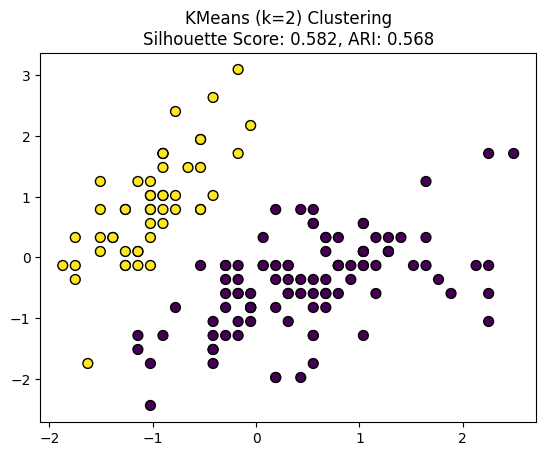

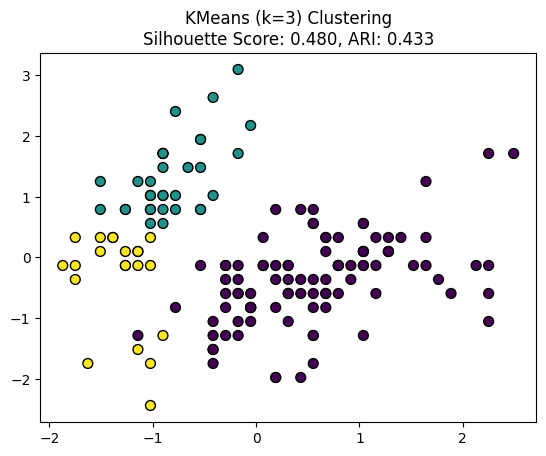

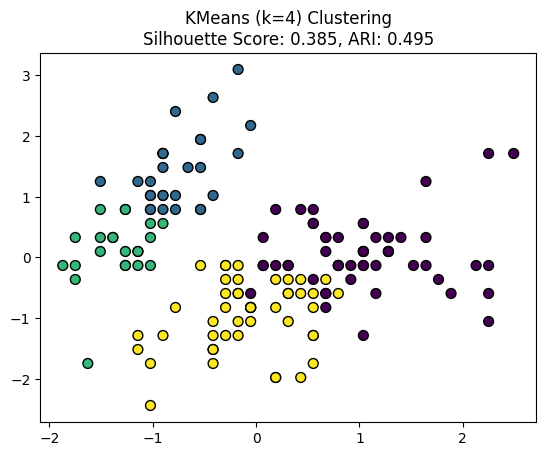

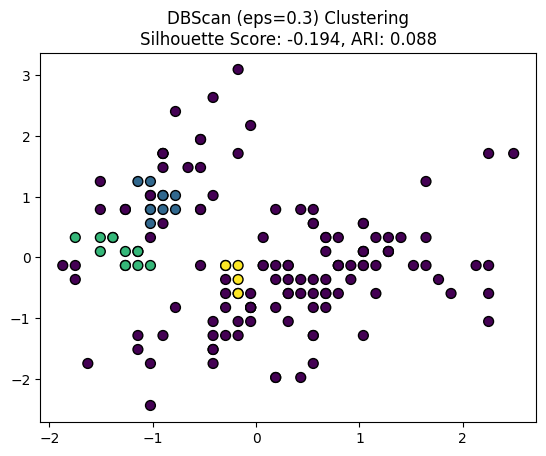

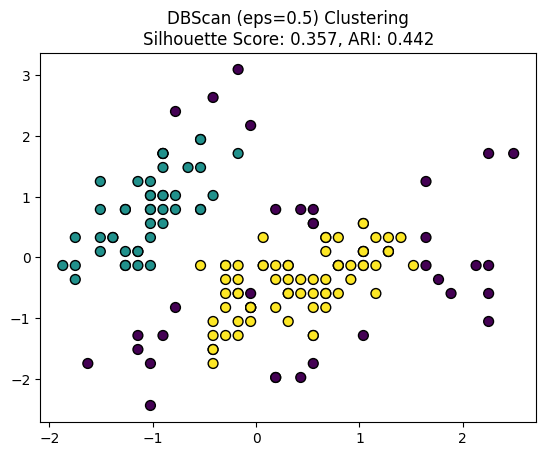

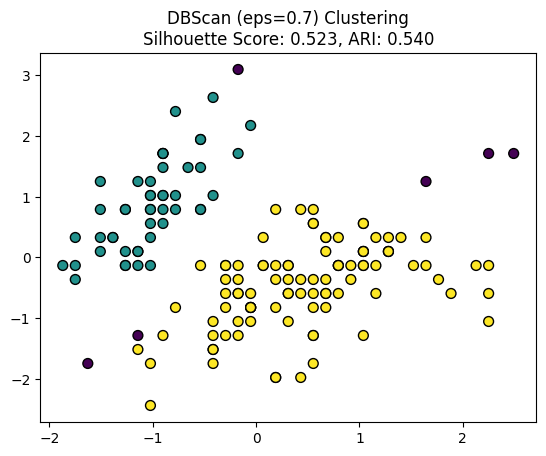

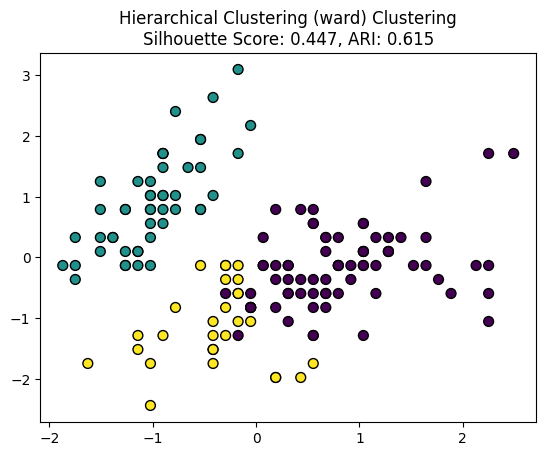

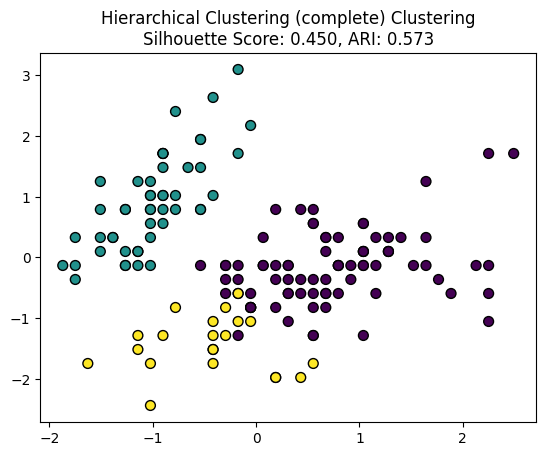

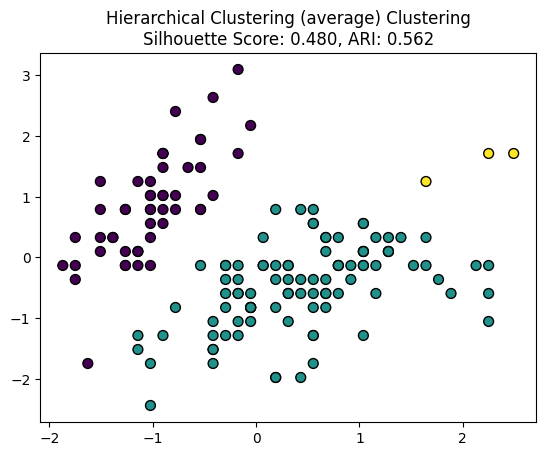

In [60]:
from sklearn.cluster import *

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Function to perform clustering and evaluate performance
def perform_clustering(model, X, y_true, name):
    # Fit the model
    labels = model.fit_predict(X)

    # Evaluate clustering performance
    silhouette = silhouette_score(X, labels)
    ari = adjusted_rand_score(y_true, labels)

    # Plot the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolors='k', s=50)
    plt.title(f'{name} Clustering\nSilhouette Score: {silhouette:.3f}, ARI: {ari:.3f}')
    plt.show()

# Function to compare KMeans with different numbers of clusters
def compare_kmeans(X, y_true):
    k_values = [2, 3, 4]
    for k in k_values:
        model = KMeans(n_clusters=k, random_state=42)
        perform_clustering(model, X, y_true, f'KMeans (k={k})')

# Function to compare DBScan with different epsilon values
def compare_dbscan(X, y_true):
    eps_values = [0.3, 0.5, 0.7]
    for eps in eps_values:
        model = DBSCAN(eps=eps)
        perform_clustering(model, X, y_true, f'DBScan (eps={eps})')

# Function to compare Hierarchical Clustering with different linkage methods
def compare_hierarchical(X, y_true):
    linkage_methods = ['ward', 'complete', 'average']
    for linkage_method in linkage_methods:
        model = AgglomerativeClustering(linkage=linkage_method, n_clusters=3)
        perform_clustering(model, X, y_true, f'Hierarchical Clustering ({linkage_method})')

# Compare KMeans, DBScan, and Hierarchical Clustering
compare_kmeans(X_std, y)
compare_dbscan(X_std, y)
compare_hierarchical(X_std, y)


Q7 Students should be promoted to take up one project on any
UCI/kaggle/data.gov.in or a dataset verified by the teacher. Preprocessing steps and at least one data mining technique should be shown on the selected dataset. This will allow the students to have a practical knowledge of how to apply the various skills learnt in the subject for a single problem/project

In [61]:
#project will use DecisionTreeClassifier for model building

#imporing SimpleImputer module for handling the missing values in the dataset
from sklearn.impute import SimpleImputer

#loading diabetes data from openml.org to check for paitent have diabetes or based on the age, mass, plasmacount, etc values.
dia_data, dia_target = fetch_openml(name='diabetes', as_frame=True, return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(dia_data, dia_target, test_size=0.2, random_state=42)

pipe = Pipeline(steps=[
    ("impute", SimpleImputer()),
    ("model", DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'impute__strategy' : ['mean', 'median'],
    'model__criterion' : ['gini', 'entropy'],
    'model__max_depth' : [3, 5, 2, 4, 6],
    'model__min_samples_split' : [2, 3, 4, 5, 6, 7, 8, 9, 10]
}

gs =GridSearchCV(pipe, param_grid=param_grid, cv=5)

gs.fit(X_train, y_train)

y_pred = gs.best_estimator_.predict(X_test)

print(classification_report(y_test, y_pred), "\n")

e:\Important\DM\venv\Lib\site-packages\sklearn\datasets\_openml.py:322: UserWarning: Multiple active versions of the dataset matching the name diabetes exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=37
- version 5, status: active
  url: https://www.openml.org/search?type=data&id=42608

  warn(warning_msg)


                 precision    recall  f1-score   support

tested_negative       0.80      0.84      0.82        99
tested_positive       0.68      0.62      0.65        55

       accuracy                           0.76       154
      macro avg       0.74      0.73      0.73       154
   weighted avg       0.76      0.76      0.76       154
 



[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(0.875, 0.375, 'x[1] <= 165.5\ngini = 0.4\nsamples = 163\nvalu

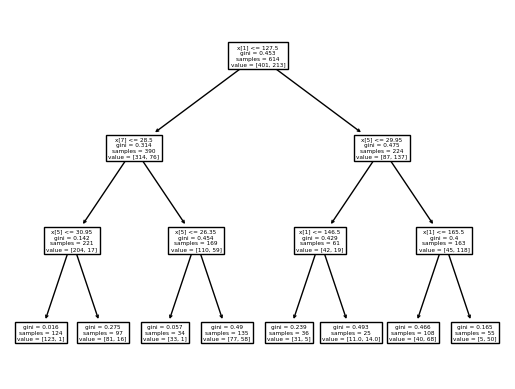

In [62]:
from sklearn import tree

tree.plot_tree(gs.best_estimator_[1])